                                                WORK FLOW
                                                Regression Problem
car data------------------- --> Data Processing---------------->Train Test Split(split data into tranning and testing data)---------------->Linear & Lasso Regression Model

New Data--------> Trained linear & Lasso Regression Model------->Car Price

# Importing the Dependencies

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


# Data Collecting and Processing

In [19]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv("CarPrice_DataSet.csv")

In [20]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
car_dataset.shape

(205, 26)

In [22]:
# getting some info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [23]:
# checking the number of missing values
car_dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [24]:
# checking the distribution of categorical data
print(car_dataset.fueltype.value_counts())
print(car_dataset.aspiration.value_counts())
print(car_dataset.doornumber.value_counts())
print(car_dataset.carbody.value_counts())
print(car_dataset.drivewheel.value_counts())
print(car_dataset.enginelocation.value_counts())
print(car_dataset.enginetype.value_counts())
print(car_dataset.cylindernumber.value_counts())
print(car_dataset.fuelsystem.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
four    115
two      90
Name: doornumber, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [25]:
# encoding fueltype column
car_dataset.replace({'fueltype':{'gas':0,'diesel':1}},inplace=True)

# encoding aspiration column
car_dataset.replace({'aspiration':{'std':0,'turbo':1}},inplace=True)

# encoding doornumber column
car_dataset.replace({'doornumber':{'four':0,'two':1}},inplace=True)

# encoding carbody column
car_dataset.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace=True)

# encoding drivewheel column
car_dataset.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace=True)

# encoding enginelocation column
car_dataset.replace({'enginelocation':{'front':0,'rear':1}},inplace=True)

# encoding enginetype column
car_dataset.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6}},inplace=True)

# encoding cylindernumber column
car_dataset.replace({'cylindernumber':{'four':0,'six':1,'five':2,'eight':3,'two':4,'three':5,'twelve':6}},inplace=True)

# encoding fuelsystem column
car_dataset.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7}},inplace=True)

In [26]:
car_dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


# Splitting  data and target

In [27]:
X = car_dataset.drop(['CarName','price'],axis=1)
# for droping column axis = 1, for droping row ...axis=0
Y = car_dataset['price'] #target variable

In [28]:
print(X)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           1        4           1   
1         2          3         0           0           1        4           1   
2         3          1         0           0           1        1           1   
3         4          2         0           0           0        0           0   
4         5          2         0           0           0        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           0        0           1   
201     202         -1         0           1           0        0           1   
202     203         -1         0           0           0        0           1   
203     204         -1         1           1           0        0           1   
204     205         -1         0           1           0        0           1   

     enginelocation  wheelb

In [29]:
print(Y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


# Splitting Training data and Test data

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2)

# Model Training

In [31]:
# 1.Linear Regression
# Loading the linear regression model
lin_reg_model = LinearRegression()

In [32]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [33]:
# prediction of training data
training_data_prediction = lin_reg_model.predict(X_train)

In [34]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R Squared error: ",error_score)

R Squared error:  0.9027674914273751


In [35]:
#predict=lin_reg_model.predict(X_test)
#accuracy
#from sklearn.metrics import accuracy_score
#print(accuracy_score(Y_test,training_data_prediction)*100)

# Visualize the actual prices and Predicted prices

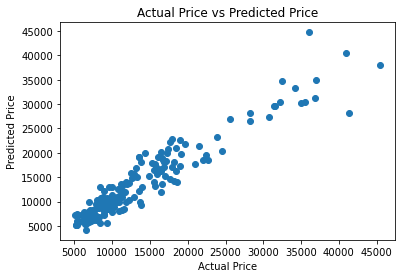

In [36]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [37]:
# prediction of test data
test_data_prediction = lin_reg_model.predict(X_test)

In [38]:
# R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error: ",error_score)

R Squared error:  0.9401935025631066


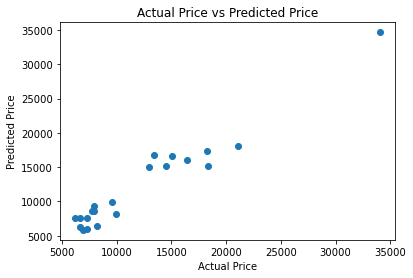

In [39]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Lasso Regression

In [40]:
lass_reg_model = Lasso()

In [41]:
lass_reg_model.fit(X_train,Y_train)

Lasso()